## Introduction
<p><img src="https://assets.datacamp.com/production/project_1174/img/trendlines.jpg" alt="Image of two trendlines over time."></p>
<p>It’s important to stay informed about trends in programming languages and technologies. Knowing what languages are growing or shrinking can help you decide where to invest. </p>
<p>An excellent source to gain a better understanding of popular technologies is <a href="https://stackoverflow.com/">Stack Overflow</a>. Stack overflow is an online question-and-answer site for coding topics. By looking at the number of questions about each technology, you can get an idea of how many people are using it.</p>
<p>You'll be working with a dataset with one observation for each tag in each year. The dataset was downloaded from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a>. Below you can find an overview of the data that is available to you:<br><br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/stack_overflow_data.csv</b></div>
<ul>
    <li><b>year:</b> The year the question was asked.</li>
    <li><b>tag:</b> A word or phrase that describes the topic of the question.</li>
    <li><b>number:</b> The number of questions with a certain tag in that year.</li>
    <li><b>year_total:</b> The total number of questions asked in that year.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/41">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around data manipulation and visualization in the Tidyverse and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/introduction-to-the-tidyverse">Introduction to the Tidyverse</a>.</em></p>

In [7]:
library(dplyr)
library(readr)
library(ggplot2)

stack_data <- read_csv("datasets/stack_overflow_data.csv")


print(stack_data)

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, number, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 420,066 × 4
    year tag                 number year_total
   <dbl> <chr>                <dbl>      <dbl>
 1  2008 treeview                69     168541
 2  2008 scheduled-tasks         30     168541
 3  2008 specifications          21     168541
 4  2008 rendering               35     168541
 5  2008 http-post                6     168541
 6  2008 static-assert            1     168541
 7  2008 asp.net-ajax           159     168541
 8  2008 collision-detection     10     168541
 9  2008 systray                  4     168541
10  2008 html-helper             20     168541
# … with 420,056 more rows


In [8]:
#  fraction of the total number of questions 

by_tag_year_fraction <- stack_data %>%
  mutate(fraction = (number / year_total * 100))

print(by_tag_year_fraction)
  

# A tibble: 420,066 × 5
    year tag                 number year_total fraction
   <dbl> <chr>                <dbl>      <dbl>    <dbl>
 1  2008 treeview                69     168541 0.0409  
 2  2008 scheduled-tasks         30     168541 0.0178  
 3  2008 specifications          21     168541 0.0125  
 4  2008 rendering               35     168541 0.0208  
 5  2008 http-post                6     168541 0.00356 
 6  2008 static-assert            1     168541 0.000593
 7  2008 asp.net-ajax           159     168541 0.0943  
 8  2008 collision-detection     10     168541 0.00593 
 9  2008 systray                  4     168541 0.00237 
10  2008 html-helper             20     168541 0.0119  
# … with 420,056 more rows


In [9]:
# r tags in 2019
r_percentage <- by_tag_year_fraction %>%
  filter(tag == "r", year == "2019") %>%
  select(fraction)

r_percentage

fraction
<dbl>
0.9656728


In [10]:
# total number of quesions for each tag

sorted_tags <- stack_data %>%
  filter(year >= 2015) %>%
  group_by(tag) %>%
  summarize(tag_total = sum(number)) %>%
  arrange(desc(tag_total))

highest_tags <- head(sorted_tags$tag, 5)
highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

In [11]:
# filter for the five largest tags

by_tag_subset <- by_tag_year_fraction %>%
  filter(tag %in% highest_tags, year >= 2015)

by_tag_subset

year,tag,number,year_total,fraction
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015,android,163793,6612772,2.476919
2015,python,137353,6612772,2.077087
2015,javascript,256039,6612772,3.871886
2015,java,215652,6612772,3.261144
2015,c#,155054,6612772,2.344766
2016,android,159838,6593600,2.424139
2016,python,158624,6593600,2.405727
2016,javascript,264379,6593600,4.009631
2016,java,197038,6593600,2.988322


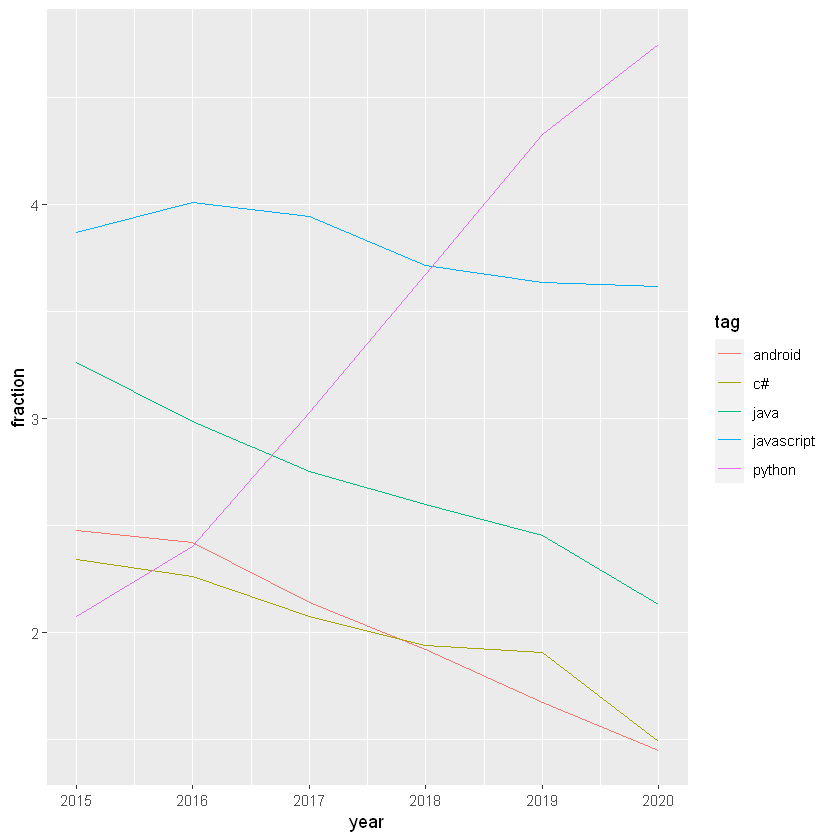

In [12]:
ggplot(by_tag_subset, aes(year, fraction, color = tag)) +
    geom_line()